<a href="https://colab.research.google.com/github/Malcolm777/Trading_algorithms/blob/master/TSLA_MACD_8_14_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#This program uses the Moving Average Crossover Divergence (MACD) to predict stock price 

In [2]:
#Import the libraries 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
plt.style.use('fivethirtyeight')

In [6]:
#Import the data
from google.colab import files 
uploaded = files.upload()

Saving TSLA.csv to TSLA.csv


In [11]:
#Get the data 
df = pd.read_csv('TSLA.csv')

#Show the index as the date 
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

#Show the data
df 

,Date,Open,High,Low,Close,Adj Close,Volume
2019-08-14,2019-08-14,231.210007,231.500000,216.690002,219.619995,219.619995,9562600
2019-08-15,2019-08-15,220.860001,221.559998,211.550003,215.639999,215.639999,8159600
2019-08-16,2019-08-16,216.660004,222.240005,216.020004,219.940002,219.940002,5098500
2019-08-19,2019-08-19,224.210007,227.830002,221.699997,226.830002,226.830002,5309600
2019-08-20,2019-08-20,227.619995,229.089996,224.539993,225.860001,225.860001,4125200
...,...,...,...,...,...,...,...
2020-08-10,2020-08-10,1448.000000,1457.500000,1385.839966,1418.569946,1418.569946,7522300
2020-08-11,2020-08-11,1396.000000,1420.000000,1365.000000,1374.390015,1374.390015,8625800
2020-08-12,2020-08-12,1470.000000,1585.000000,1435.000000,1554.760010,1554.760010,21898800
2020-08-13,2020-08-13,1611.000000,1651.180054,1567.260010,1621.000000,1621.000000,20311400


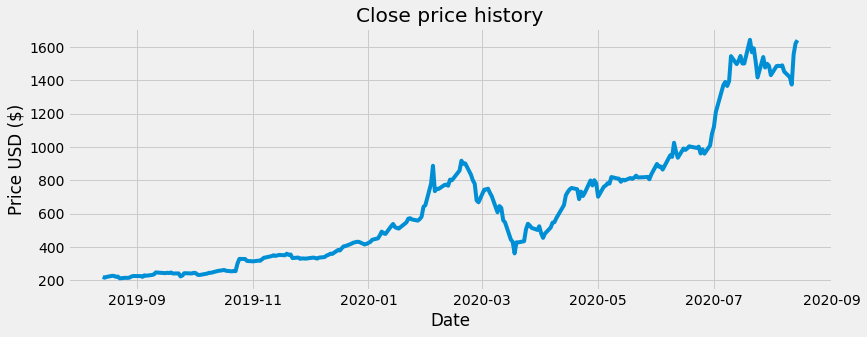

In [12]:
#Visually show the stock price 
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Close'], label='Close')
plt.title('Close price history')
plt.xlabel('Date')
plt.ylabel('Price USD ($)')
plt.show()

In [21]:
#Calculate the MACD and the single line indicators 

#Calculate the shortEMA 
shortEMA = df.Close.ewm(span=12, adjust=False).mean()

#Calculate the longEMA 
longEMA = df.Close.ewm(span=26, adjust=False).mean()

#Calculate the MACD 
MACD = shortEMA - longEMA 

#Calculate the Signal 
Signal = MACD.ewm(span=9, adjust=False).mean()


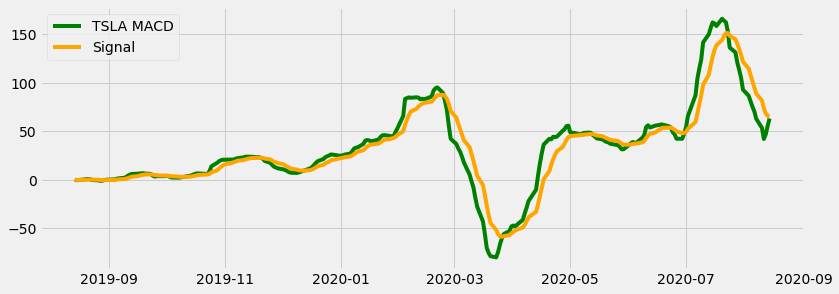

In [22]:
#Plot the chart 
plt.figure(figsize=(12.2, 4.5))
plt.plot(df.index, MACD, label = 'TSLA MACD', color = 'green', alpha=1) 
plt.plot(df.index, Signal, label = 'Signal', color = 'orange', alpha=1)
plt.legend(loc = 'upper left')
plt.show()

In [23]:
#Create the new columns for the data 
df['MACD'] = MACD 
df['Signal line'] = Signal

In [60]:
#Create a function to signal when to buy and sell an asset 
def buy_sell(signal): 
  Buy = []
  Sell = []
  flag = -1 

  for i in range(0, len(signal)): 
    if signal['MACD'][i] > signal['Signal line'][i]: 
      Sell.append(np.nan)
      if flag != 1: 
        Buy.append(signal['Close'][i])
        flag = 1
      else: 
        Buy.append(np.nan)
    elif signal['MACD'][i] < signal['Signal line'][i]: 
      Buy.append(np.nan)
      if flag != 0: 
        Sell.append(signal['Close'][i])
        flag = 0
      else: 
        Sell.append(np.nan)
    else: 
      Buy.append(np.nan)
      Sell.append(np.nan)

  return (Buy, Sell)
  
      

In [61]:
#Create a buy and sell column 
a = buy_sell(df)
df['Buy_Signal_Price'] = a[0] 
df['Sell_Signal_Price'] = a[1]

In [62]:
#Show the data 
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal line,Buy_Signal_Price,Sell_Signal_Price
2019-08-14,2019-08-14,231.210007,231.500000,216.690002,219.619995,219.619995,9562600,0.000000,0.000000,NaN,NaN
2019-08-15,2019-08-15,220.860001,221.559998,211.550003,215.639999,215.639999,8159600,-0.317493,-0.063499,NaN,215.639999
2019-08-16,2019-08-16,216.660004,222.240005,216.020004,219.940002,219.940002,5098500,-0.219602,-0.094719,NaN,NaN
2019-08-19,2019-08-19,224.210007,227.830002,221.699997,226.830002,226.830002,5309600,0.409225,0.006070,226.830002,NaN
2019-08-20,2019-08-20,227.619995,229.089996,224.539993,225.860001,225.860001,4125200,0.819853,0.168826,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-10,2020-08-10,1448.000000,1457.500000,1385.839966,1418.569946,1418.569946,7522300,53.568492,81.758856,NaN,NaN
2020-08-11,2020-08-11,1396.000000,1420.000000,1365.000000,1374.390015,1374.390015,8625800,42.096345,73.826353,NaN,NaN
2020-08-12,2020-08-12,1470.000000,1585.000000,1435.000000,1554.760010,1554.760010,21898800,47.016955,68.464474,NaN,NaN
2020-08-13,2020-08-13,1611.000000,1651.180054,1567.260010,1621.000000,1621.000000,20311400,55.620429,65.895665,NaN,NaN


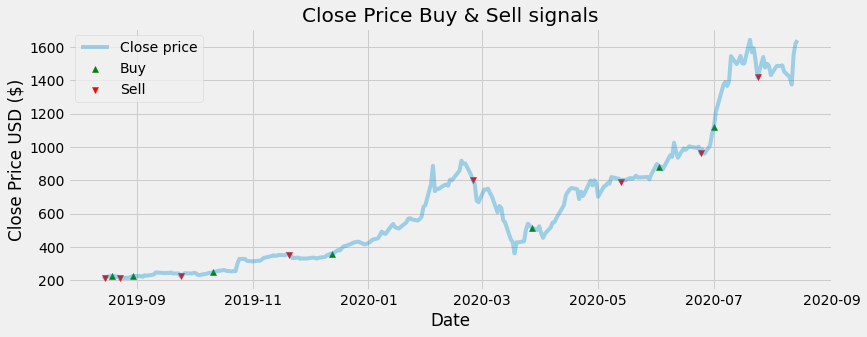

In [63]:
#Visually show the stock buy and sell signals 
plt.figure(figsize=(12.2, 4.5))
plt.scatter(df.index, df['Buy_Signal_Price'], color = 'green', label='Buy', marker='^', alpha = 1)
plt.scatter(df.index, df['Sell_Signal_Price'], color = 'red', label='Sell', marker='v', alpha = 1)
plt.plot(df['Close'], label='Close price', alpha = 0.35) 
plt.title('Close Price Buy & Sell signals')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(loc = 'upper left')
plt.show()
